In [1]:
import pyVHR as vhr
import numpy as np

vhr.plot.VisualizeParams.renderer = 'notebook'  # colab or 'notebook'

2022-09-15 00:19:13.895872: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
dataset_name = 'lgi_ppgi'          
video_DIR = '../datasets/LGI-PPGI/' 
BVP_DIR = '../datasets/LGI-PPGI/' 

dataset = vhr.datasets.datasetFactory(dataset_name, videodataDIR=video_DIR, BVPdataDIR=BVP_DIR)
allvideo = dataset.videoFilenames
"""
for v in range(len(allvideo)):
  print(v, allvideo[v])
"""

'\nfor v in range(len(allvideo)):\n  print(v, allvideo[v])\n'

In [3]:
wsize = 1          # seconds of video processed (with overlapping) for each estimate 
video_idx = 1      # index of the video to be processed
fname = dataset.getSigFilename(video_idx)
sigGT = dataset.readSigfile(fname)
test_bvp = sigGT.data
bpmGT, timesGT = sigGT.getBPM(wsize)
videoFileName = dataset.getVideoFilename(video_idx)
print('Video processed name: ', videoFileName)
fps = vhr.extraction.get_fps(videoFileName)
print('Video frame rate:     ',fps)

Video processed name:  ../datasets/LGI-PPGI/alex/alex_resting/cv_camera_sensor_stream_handler.avi
Video frame rate:      25.0


In [4]:
vhr.plot.display_video(videoFileName)

interactive(children=(IntSlider(value=0, description='x', max=1835), Output()), _dom_classes=('widget-interact…

In [5]:
sig_extractor = vhr.extraction.SignalProcessing()
sig_extractor.display_cuda_device()
sig_extractor.choose_cuda_device(0)

# CUDA devices:  1
# device number  0 :  NVIDIA GeForce RTX 3060


## Face parsing

In [15]:
sig_extractor.set_skin_extractor(vhr.extraction.SkinExtractionFaceParsing('GPU'))

In [16]:
seconds = 30
sig_extractor.set_total_frames(seconds*fps)

In [18]:
vhr.extraction.SkinProcessingParams.RGB_LOW_TH = 2
vhr.extraction.SkinProcessingParams.RGB_HIGH_TH = 254

vhr.extraction.SignalProcessingParams.RGB_LOW_TH = 2
vhr.extraction.SignalProcessingParams.RGB_HIGH_TH = 254

In [20]:
sig_extractor.set_visualize_skin_and_landmarks(
      visualize_skin=True, 
      visualize_landmarks=True, 
      visualize_landmarks_number=True, 
      visualize_patch=True)

In [21]:
landmarks = vhr.extraction.MagicLandmarks.cheek_left_top +\
                   vhr.extraction.MagicLandmarks.forehead_center +\
                   vhr.extraction.MagicLandmarks.forehoead_right +\
                   vhr.extraction.MagicLandmarks.cheek_right_top +\
                   vhr.extraction.MagicLandmarks.forehead_left +\
                   vhr.extraction.MagicLandmarks.nose 


Num landmarks:  107



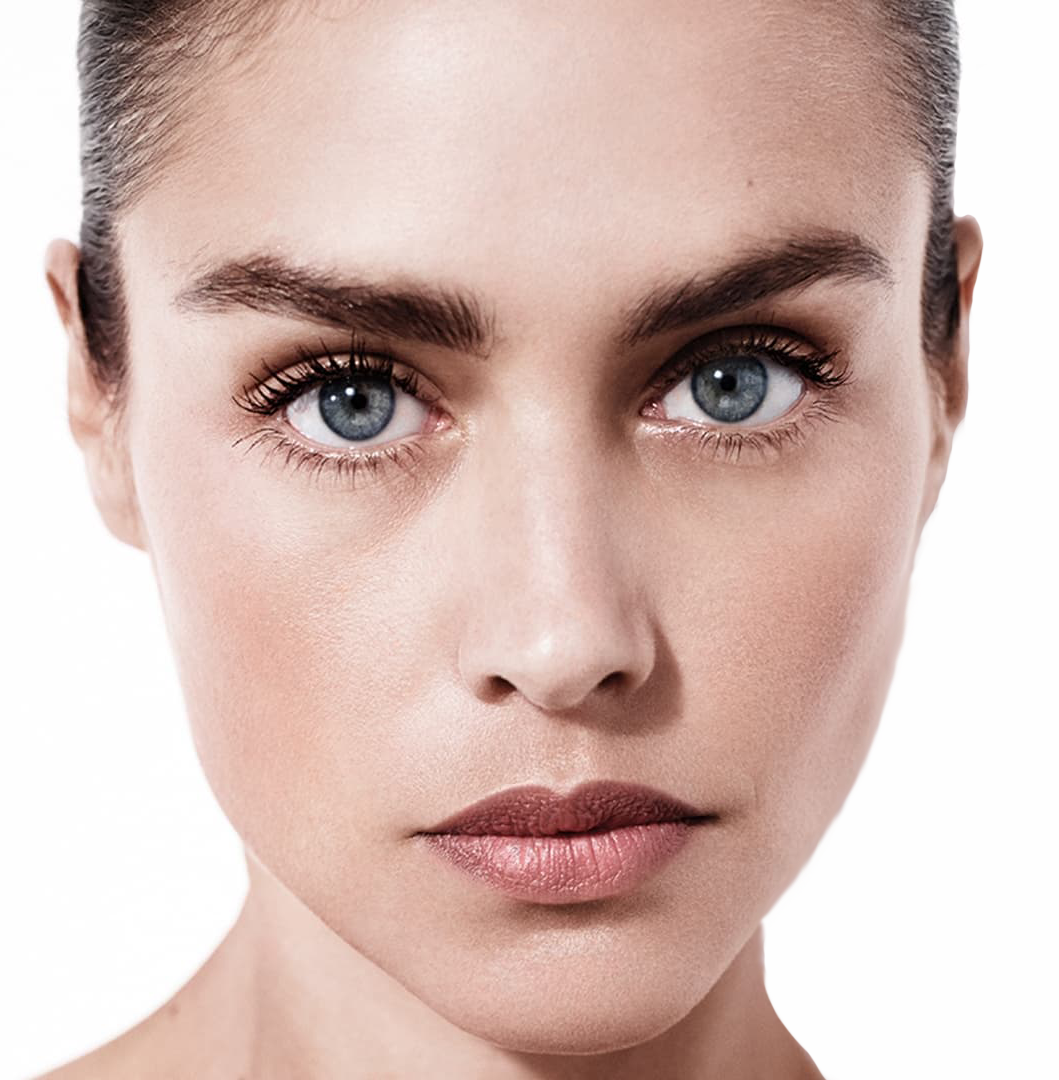

In [22]:
print('Num landmarks: ', len(landmarks))
vhr.plot.visualize_landmarks_list(landmarks_list=landmarks)

In [23]:
sig_extractor.set_landmarks(landmarks)

### Holistic

In [24]:
hol_sig = sig_extractor.extract_holistic(videoFileName)
print('Size: (#frames, #landmarks, #channels) = ',hol_sig.shape)

Size: (#frames, #landmarks, #channels) =  (750, 1, 3)


In [25]:
visualize_skin_coll = sig_extractor.get_visualize_skin()
print('Number of frames processed: ',len(visualize_skin_coll))
vhr.plot.interactive_image_plot(visualize_skin_coll,1.0)

Number of frames processed:  750


interactive(children=(IntSlider(value=0, description='x', max=749), Output()), _dom_classes=('widget-interact'…

### Patches

In [26]:
sig_extractor.set_square_patches_side(30.0)
patch_sig = sig_extractor.extract_patches(videoFileName, "squares", "mean")
print('Size: (#frames, #landmarks, #channels) = ', patch_sig.shape)

Size: (#frames, #landmarks, #channels) =  (750, 107, 3)


In [27]:
visualize_patches_coll = sig_extractor.get_visualize_patches()
print('Number of frames processed: ',len(visualize_patches_coll))
vhr.plot.interactive_image_plot(visualize_patches_coll,1.0)

Number of frames processed:  750


interactive(children=(IntSlider(value=0, description='x', max=749), Output()), _dom_classes=('widget-interact'…

## Convex hull

In [28]:
sig_extractor.set_skin_extractor(vhr.extraction.SkinExtractionConvexHull('GPU'))


In [29]:
seconds = 30
sig_extractor.set_total_frames(seconds*fps)

In [30]:
hol_sig = sig_extractor.extract_holistic(videoFileName)
print('Size: (#frames, #landmarks, #channels) = ',hol_sig.shape)

Size: (#frames, #landmarks, #channels) =  (750, 1, 3)


In [31]:
visualize_skin_coll = sig_extractor.get_visualize_skin()
print('Number of frames processed: ',len(visualize_skin_coll))
vhr.plot.interactive_image_plot(visualize_skin_coll,1.0)

Number of frames processed:  750


interactive(children=(IntSlider(value=0, description='x', max=749), Output()), _dom_classes=('widget-interact'…

In [32]:
sig_extractor.set_square_patches_side(30.0)
patch_sig = sig_extractor.extract_patches(videoFileName, "squares", "mean")
print('Size: (#frames, #landmarks, #channels) = ', patch_sig.shape)

Size: (#frames, #landmarks, #channels) =  (750, 107, 3)


In [33]:
visualize_patches_coll = sig_extractor.get_visualize_patches()
print('Number of frames processed: ',len(visualize_patches_coll))
vhr.plot.interactive_image_plot(visualize_patches_coll,1.0)

Number of frames processed:  750


interactive(children=(IntSlider(value=0, description='x', max=749), Output()), _dom_classes=('widget-interact'…